import library yang dibutuhkan

In [50]:
import pandas as pd
from tqdm import tqdm
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score, make_scorer, accuracy_score, precision_score
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer

baca file CSV yang ada pada sampe_data

In [6]:
file = '/content/sample_data/[Dataset]_(Viral_Konten_MedSos).csv'
df = pd.read_csv(file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722 entries, 0 to 1721
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             1722 non-null   object 
 1    timedelta                      1722 non-null   float64
 2    n_tokens_title                 1722 non-null   float64
 3    n_tokens_content               1722 non-null   float64
 4    n_unique_tokens                1722 non-null   float64
 5    n_non_stop_words               1722 non-null   float64
 6    n_non_stop_unique_tokens       1722 non-null   float64
 7    num_hrefs                      1722 non-null   float64
 8    num_self_hrefs                 1722 non-null   float64
 9    num_imgs                       1722 non-null   float64
 10   num_videos                     1722 non-null   float64
 11   average_token_length           1722 non-null   float64
 12   num_keywords                   17

In [7]:
contentdf = df.copy()
contentdf.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593.0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711.0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500.0
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200.0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505.0


In [7]:
contentdf.shape

(23929, 61)

In [119]:
contentdf.isnull().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
viral                            0
Length: 62, dtype: int64

cek dan hapus nilai nilai yang kosong

In [120]:
# Memeriksa nilai yang hilang
missing_values = contentdf.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [121]:
NA = contentdf.isnull().sum()
totalcell = np.product(contentdf.shape)
missing = NA.sum()
print(missing/totalcell*100)

0.0


In [122]:
contentdf= contentdf.dropna()
NA = contentdf.isnull().sum()
totalcell = np.product(contentdf.shape)
missing = NA.sum()
print(missing/totalcell*100)

0.0


In [10]:
print(contentdf.columns.tolist())

['url', ' timedelta', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', ' global_rate_negative_words', ' rate_positive_words', '

In [11]:
contentdf['viral'] = contentdf[' shares'] >= 700
contentdf[[' shares', 'viral']].shape

(23929, 2)

In [12]:
contentdf[' shares'].value_counts()

 shares
1100.0     1296
1200.0     1163
1300.0      999
1400.0      919
1500.0      782
           ... 
137.0         1
134.0         1
186.0         1
51.0          1
34600.0       1
Name: count, Length: 1306, dtype: int64

distribusi persebaran shares dibawah 5000, karena diatas 5000 persebaran tidak terlalu kelihatan

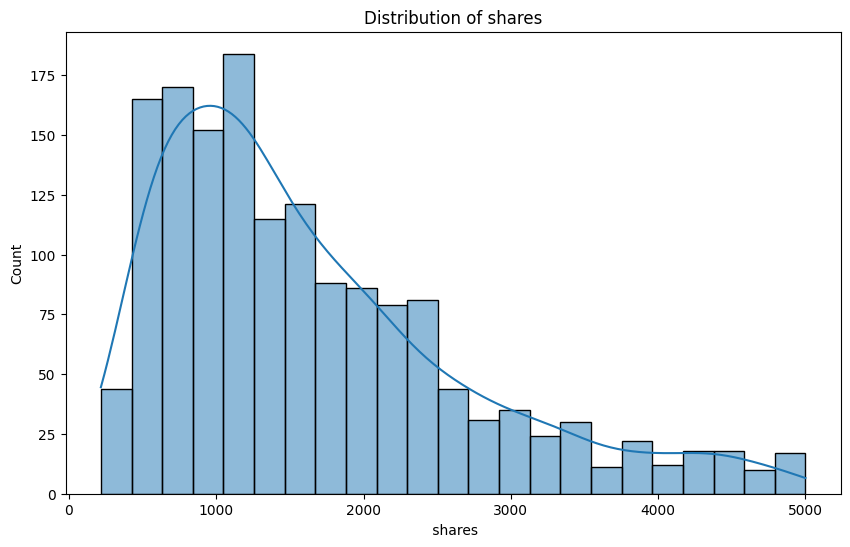

In [132]:
plt.figure(figsize=(10, 6))
filtered_data = contentdf[contentdf[' shares'] <= 5000]
sns.histplot(filtered_data[' shares'], kde=True)
plt.title('Distribution of shares')
plt.show()

training AI

In [57]:
# Select relevant features
features = [
    ' timedelta', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
    ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs',
    ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords',
    ' data_channel_is_lifestyle', ' data_channel_is_entertainment',
    ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech',
    ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max',
    ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
    ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess',
    ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday',
    ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend',
    ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity',
    ' global_sentiment_polarity', ' global_rate_positive_words', ' global_rate_negative_words',
    ' rate_positive_words', ' rate_negative_words', ' avg_positive_polarity',
    ' min_positive_polarity', ' max_positive_polarity', ' avg_negative_polarity',
    ' min_negative_polarity', ' max_negative_polarity', ' title_subjectivity',
    ' title_sentiment_polarity', ' abs_title_subjectivity', ' abs_title_sentiment_polarity'
]

X = contentdf[features]
y = contentdf[' shares']

In [19]:
# Mengatasi missing values (jika ada)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Membagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Memprediksi nilai shares pada data testing
y_pred = nb_model.predict(X_test)

# Evaluasi kinerja model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')

Accuracy: 0.014492753623188406
Precision: 0.013438003220611916


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
# Menentukan variabel target
contentdf['viral'] = contentdf[' shares'] >= 700

# Pilih fitur dan target
X = contentdf[features]
y = contentdf['viral']

# Mengatasi missing values (jika ada)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Membagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Memprediksi nilai shares pada data testing
y_pred = nb_model.predict(X_test)

# Evaluasi kinerja model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')

Accuracy: 0.5942028985507246
Precision: 0.7817079152731325


In [133]:

# Mengubah nilai 'shares' menjadi variabel biner 'viral'
contentdf['viral'] = contentdf[' shares'] >= 700

# Pilih fitur dan target
X = contentdf[features]
y = contentdf['viral']

# Mengatasi missing values (jika ada)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Normalisasi data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Seleksi fitur menggunakan SelectKBest
selector = SelectKBest(score_func=f_classif, k=20)  # Misalnya, kita pilih 20 fitur terbaik
X_new = selector.fit_transform(X, y)

# Menyimpan hasil evaluasi
accuracy_scores = []
precision_scores = []

# Inisialisasi jumlah epoch dan iterasi
epochs = 10000
epoch = 0

progress_bar = tqdm(total=epochs, desc='Training Progress', position=0)
while epoch < epochs:
    # Membagi dataset menjadi training dan testing set
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=epoch)

    # Melatih model Naive Bayes
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)

    # Memprediksi nilai shares pada data testing
    y_pred = nb_model.predict(X_test)

    # Evaluasi kinerja model pada test set
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')

    # Menyimpan hasil evaluasi
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)

    # Increment epoch
    epoch += 1

    # Update bar progres
    progress_bar.update(1)

# Menutup bar progres setelah selesai
progress_bar.close()

# Menghitung rata-rata dan standar deviasi dari metrik
# Menghitung rata-rata dan standar deviasi dari metrik
print()
mean_accuracy_percent = np.mean(accuracy_scores) * 100
std_accuracy_percent = np.std(accuracy_scores) * 100
mean_precision_percent = np.mean(precision_scores) * 100
std_precision_percent = np.std(precision_scores) * 100

print(f'Mean Accuracy: {mean_accuracy_percent:.2f}% ± {std_accuracy_percent:.2f}%')
print(f'Mean Precision: {mean_precision_percent:.2f}% ± {std_precision_percent:.2f}%')

Training Progress: 100%|██████████| 10000/10000 [01:07<00:00, 147.87it/s]


Mean Accuracy: 24.68% ± 2.11%
Mean Precision: 82.69% ± 3.63%


In [148]:
# Data baru yang akan dievaluasi (misalkan kita punya beberapa contoh baru)
new_articles_data = [
    {' n_tokens_title': 12, ' n_tokens_content': 800, ' n_unique_tokens': 0.6, ' n_non_stop_words': 0.85,
     ' n_non_stop_unique_tokens': 0.65, ' num_hrefs': 10, ' num_self_hrefs': 3, ' num_imgs': 5, ' num_videos': 20,
     ' average_token_length': 5, ' num_keywords': 8, ' data_channel_is_lifestyle': 1, ' data_channel_is_entertainment': 0,
     ' data_channel_is_bus': 0, ' data_channel_is_socmed': 1, ' data_channel_is_tech': 0, ' data_channel_is_world': 0,
     ' kw_min_min': 3, ' kw_max_min': 60, ' shares': 12000},
    {' n_tokens_title': 15, ' n_tokens_content': 1500, ' n_unique_tokens': 0.7, ' n_non_stop_words': 0.9,
     ' n_non_stop_unique_tokens': 0.75, ' num_hrefs': 15, ' num_self_hrefs': 5, ' num_imgs': 10, ' num_videos': 30,
     ' average_token_length': 5.2, ' num_keywords': 10, ' data_channel_is_lifestyle': 0, ' data_channel_is_entertainment': 1,
     ' data_channel_is_bus': 0, ' data_channel_is_socmed': 0, ' data_channel_is_tech': 0, ' data_channel_is_world': 0,
     ' kw_min_min': 5, ' kw_max_min': 70, ' shares': 15000},
    {' n_tokens_title': 10, ' n_tokens_content': 500, ' n_unique_tokens': 0.5, ' n_non_stop_words': 0.8,
     ' n_non_stop_unique_tokens': 0.6, ' num_hrefs': 5, ' num_self_hrefs': 2, ' num_imgs': 3, ' num_videos': 5,
     ' average_token_length': 4.5, ' num_keywords': 7, ' data_channel_is_lifestyle': 1, ' data_channel_is_entertainment': 0,
     ' data_channel_is_bus': 0, ' data_channel_is_socmed': 1, ' data_channel_is_tech': 0, ' data_channel_is_world': 0,
     ' kw_min_min': 2, ' kw_max_min': 50, ' shares': 3000},
    {' n_tokens_title': 0, ' n_tokens_content': 2000, ' n_unique_tokens': 0, ' n_non_stop_words': 0,
     ' n_non_stop_unique_tokens': 0, ' num_hrefs': 0, ' num_self_hrefs': 0, ' num_imgs': 0, ' num_videos': 7,
     ' average_token_length': 0, ' num_keywords': 0, ' data_channel_is_lifestyle': 0, ' data_channel_is_entertainment': 0,
     ' data_channel_is_bus': 0, ' data_channel_is_socmed': 1, ' data_channel_is_tech': 0, ' data_channel_is_world': 0,
     ' kw_min_min': 0, ' kw_max_min': 0, ' shares': 0},
    {' n_tokens_title': 0, ' n_tokens_content': 800, ' n_unique_tokens': 0, ' n_non_stop_words': 0,
     ' n_non_stop_unique_tokens': 0, ' num_hrefs': 0, ' num_self_hrefs': 0, ' num_imgs': 0, ' num_videos': 15,
     ' average_token_length': 0, ' num_keywords': 0, ' data_channel_is_lifestyle': 0, ' data_channel_is_entertainment': 0,
     ' data_channel_is_bus': 0, ' data_channel_is_socmed': 1, ' data_channel_is_tech': 0, ' data_channel_is_world': 0,
     ' kw_min_min': 0, ' kw_max_min': 0, ' data_channel_is_socmed': 0.2, ' shares': 1000},
    {' n_tokens_title': 25, ' n_tokens_content': 800, ' n_unique_tokens': 0.2, ' n_non_stop_words': 1,
     ' n_non_stop_unique_tokens': 0.6, ' num_hrefs': 10, ' num_self_hrefs': 5, ' num_imgs': 20, ' num_videos': 25,
     ' average_token_length': 0, ' num_keywords': 0, ' data_channel_is_lifestyle': 0, ' data_channel_is_entertainment': 0,
     ' data_channel_is_bus': 0, ' data_channel_is_socmed': 1, ' data_channel_is_tech': 0, ' data_channel_is_world': 0,
     ' kw_min_min': 0, ' kw_max_min': 0, ' shares': 2500},
    {' n_tokens_title': 12, ' n_tokens_content': 1200, ' n_unique_tokens': 0.65, ' n_non_stop_words': 0.87,
     ' n_non_stop_unique_tokens': 0.7, ' num_hrefs': 12, ' num_self_hrefs': 4, ' num_imgs': 8, ' num_videos': 18,
     ' average_token_length': 5.1, ' num_keywords': 9, ' data_channel_is_lifestyle': 0, ' data_channel_is_entertainment': 1,
     ' data_channel_is_bus': 0, ' data_channel_is_socmed': 0,      ' data_channel_is_tech': 0, ' data_channel_is_world': 0,
     ' kw_min_min': 4, ' kw_max_min': 65, ' shares': 8000},
    {' n_tokens_title': 14, ' n_tokens_content': 1000, ' n_unique_tokens': 0.55, ' n_non_stop_words': 0.84,
     ' n_non_stop_unique_tokens': 0.62, ' num_hrefs': 8, ' num_self_hrefs': 3, ' num_imgs': 6, ' num_videos': 12,
     ' average_token_length': 4.7, ' num_keywords': 8, ' data_channel_is_lifestyle': 1, ' data_channel_is_entertainment': 0,
     ' data_channel_is_bus': 0, ' data_channel_is_socmed': 0.7, ' data_channel_is_tech': 0, ' data_channel_is_world': 0,
     ' kw_min_min': 3, ' kw_max_min': 55, ' shares': 5000},
    {' n_tokens_title': 11, ' n_tokens_content': 700, ' n_unique_tokens': 0.6, ' n_non_stop_words': 0.83,
     ' n_non_stop_unique_tokens': 0.64, ' num_hrefs': 6, ' num_self_hrefs': 2, ' num_imgs': 4, ' num_videos': 8,
     ' average_token_length': 4.6, ' num_keywords': 7, ' data_channel_is_lifestyle': 1, ' data_channel_is_entertainment': 0,
     ' data_channel_is_bus': 0, ' data_channel_is_socmed': 0.9, ' data_channel_is_tech': 0, ' data_channel_is_world': 0,
     ' kw_min_min': 2, ' kw_max_min': 52, ' shares': 3500},
    {' n_tokens_title': 9, ' n_tokens_content': 400, ' n_unique_tokens': 0.45, ' n_non_stop_words': 0.78,
     ' n_non_stop_unique_tokens': 0.58, ' num_hrefs': 4, ' num_self_hrefs': 1, ' num_imgs': 2, ' num_videos': 3,
     ' average_token_length': 4.3, ' num_keywords': 6, ' data_channel_is_lifestyle': 1, ' data_channel_is_entertainment': 0,
     ' data_channel_is_bus': 0, ' data_channel_is_socmed': 0.5, ' data_channel_is_tech': 0, ' data_channel_is_world': 0,
     ' kw_min_min': 2, ' kw_max_min': 48, ' shares': 2000},
    {' n_tokens_title': 13, ' n_tokens_content': 900, ' n_unique_tokens': 0.58, ' n_non_stop_words': 0.86,
     ' n_non_stop_unique_tokens': 0.67, ' num_hrefs': 9, ' num_self_hrefs': 3, ' num_imgs': 6, ' num_videos': 15,
     ' average_token_length': 4.8, ' num_keywords': 7, ' data_channel_is_lifestyle': 0, ' data_channel_is_entertainment': 1,
     ' data_channel_is_bus': 0, ' data_channel_is_socmed': 0.8, ' data_channel_is_tech': 0, ' data_channel_is_world': 0,
     ' kw_min_min': 3, ' kw_max_min': 57, ' shares': 6500},
]


# DataFrame dari artikel baru
new_articles_df = pd.DataFrame(new_articles_data)
new_articles_df = new_articles_df.dropna()

threshold_percentage = 90
threshold_num_hrefs = np.percentile([article[' num_hrefs'] for article in new_articles_data], threshold_percentage)

# Tentukan apakah setiap artikel baru dianggap viral atau tidak
actual_viral = [article[' num_hrefs'] >= threshold_num_hrefs for article in new_articles_data]

threshold_num_hrefs = np.percentile([article[' shares'] for article in new_articles_data], threshold_percentage)

# Tentukan apakah setiap artikel baru dianggap viral atau tidak
actual_viral = [article[' shares'] >= threshold_num_hrefs for article in new_articles_data]

threshold_num_hrefs = np.percentile([article[' n_tokens_title'] for article in new_articles_data], threshold_percentage)

# Tentukan apakah setiap artikel baru dianggap viral atau tidak
actual_viral = [article[' n_tokens_title'] >= threshold_num_hrefs for article in new_articles_data]

threshold_num_hrefs = np.percentile([article[' n_tokens_content'] for article in new_articles_data], threshold_percentage)

# Tentukan apakah setiap artikel baru dianggap viral atau tidak
actual_viral = [article[' n_tokens_content'] >= threshold_num_hrefs for article in new_articles_data]

threshold_num_hrefs = np.percentile([article[' data_channel_is_socmed'] for article in new_articles_data], threshold_percentage)

# Tentukan apakah setiap artikel baru dianggap viral atau tidak
actual_viral = [article[' data_channel_is_socmed'] >= threshold_num_hrefs for article in new_articles_data]

threshold_num_hrefs = np.percentile([article[' num_videos'] for article in new_articles_data], threshold_percentage)

# Tentukan apakah setiap artikel baru dianggap viral atau tidak
actual_viral = [article[' num_videos'] >= threshold_num_hrefs for article in new_articles_data]

threshold_num_hrefs = np.percentile([article[' num_imgs'] for article in new_articles_data], threshold_percentage)

# Tentukan apakah setiap artikel baru dianggap viral atau tidak
actual_viral = [article[' num_imgs'] >= threshold_num_hrefs for article in new_articles_data]

# Seleksi fitur yang sama seperti saat melatih model
selected_features = selector.transform(new_articles_df.values)
selected_features_df = pd.DataFrame(selected_features, columns=np.array(features)[selector.get_support()])

# Skala fitur-fitur
scaled_features_df = pd.DataFrame(scaler.transform(selected_features_df), columns=selected_features_df.columns)

# Lakukan prediksi menggunakan model
predictions = nb_model.predict(scaled_features_df)

# Hitung akurasi secara keseluruhan
accuracy = (predictions == actual_viral).mean() * 100

print("Akurasi Model:", accuracy, "%")

Akurasi Model: 18.181818181818183 %


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
